#### Topic: Hw4, Machine-Learning-2019-fall
#### Date: 2019-11-1
#### Author: 林俊儒(B063040058), 王譽鈞(B065040034)

---
#### HW PART 1:
##### 利用 tensorflow 撰寫一個多層的神經網路去模擬一個函數 $f(x)=x^3+x^2-x-1$
##### 比較採用不同層級、不同神經元個數所達到的模擬效果。
##### 並請將實際及模擬的結果顯示在圖形上。
---

##### !!!!!
###### 載入 tensotflow 不知道為什麼第一次都會有Warning message，
###### 有時這個cell 需要多執行幾次
##### !!!!!

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

---
##### 老師上課時說，希望我們練習用tensor flow寫，先不要直接用keras
##### 所以我們使用的 tensor flow add layer 的function 是比較舊的版本
##### 執行時會噴很多warning message
---

##### => 定義要模擬的funcion 與 要用的資料集
##### 我們選擇 [-20,20]這個區間
##### 切出500個點 用來訓練
##### 再製造500個跟訓練點有一些些差距的點來預測

In [2]:
def ans_function(data):
    return data**3 + data**2 - data - 1

#宣告一些紀錄用的變數
case1_record = 0; case1_str = "1-layer-___5-neurons"
case2_record = 0; case2_str = "1-layer-__20-neurons"
case3_record = 0; case3_str = "1-layer-_100-neurons"
case4_record = 0; case4_str = "1-layer-1000-neurons"
case5_record = 0; case5_str = "2-layer-__20-neurons"
case6_record = 0; case6_str = "5-layer-__20-neurons"
case7_record = 0; case7_str = "5-layer-__40-neurons"

#定義測試資料與範圍, 讓x落在 [-20,+20]
data_dimen = 1 #資料維度是1, 就是1個 x值
data_num = 500 #一次丟500個 x
left_edge = -20 #左邊界
right_edge = +20 #右邊界
x_train = np.linspace( left_edge, right_edge, data_num) 
x_train = x_train.reshape(1,data_num)
y_train = ans_function(x_train)

x_test = np.linspace( left_edge, right_edge, data_num) 
for item in x_test:
    item += 0.001
x_test = x_test.reshape(1,data_num)
y_test = ans_function(x_test)

#### 測試 case 1:
##### 只用一層、5 顆 neuro
###### activation function 使用 relu
###### optimizer function 使用 AdamOptimizer
###### epochs 設 100 次

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
--------------------------------------------
之前的紀錄: 
(尚無)
--------------------------------------------
1-layer-___5-neurons : loss_val: 8849060.0
--------------------------------------------


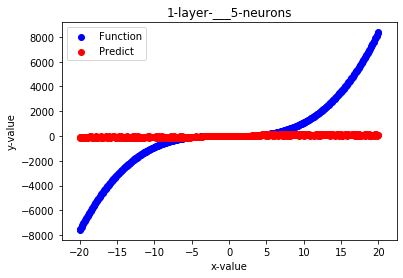

In [3]:
first_layer_num = 5 #1層, 5個neuro
epochs = 100

x_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))
y_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))

first_layer = tf.layers.dense(inputs = x_holder, units = first_layer_num, \
                              activation =  tf.nn.relu)
y_pred = tf.layers.dense(inputs = first_layer, units = data_num)

loss = tf.losses.mean_squared_error(y_pred, y_holder)
optimizer = tf.train.AdamOptimizer()
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: x_train, y_holder: y_train }
    for _ in range(epochs):
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    
    ud , loss_val, yp = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    case1_record = loss_val
    print("--------------------------------------------")
    print("之前的紀錄: ")
    print("(尚無)")
    print("--------------------------------------------")
    print(case1_str, ": loss_val:",case1_record)
    print("--------------------------------------------")
    
    plt.xlabel('x-value')
    plt.ylabel('y-value')
    plt.title(case1_str)
    plt.scatter( list(x for x in x_test), list(y for y in y_test) ,color = 'blue',label='Function')
    plt.scatter( list(x for x in x_test), list(x for x in pred_val) ,color = 'red', label='Predict')
    plt.legend()
    plt.show()

#### 從上圖可以看到
#### 只用5顆真的不準，我們提升到20顆試試
---

#### 測試 case 2:
##### 只用一層、20 顆 neuro
###### activation function 使用 relu
###### optimizer function 使用 AdamOptimizer
###### epochs 設 100 次

--------------------------------------------
之前的紀錄: 
1-layer-___5-neurons : loss_val: 8849060.0
--------------------------------------------
1-layer-__20-neurons : loss_val: 6919628.5
--------------------------------------------


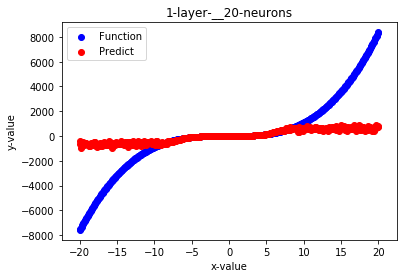

In [4]:
first_layer_num = 20 #1層, 20個neuro
epochs = 100

x_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))
y_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))

first_layer = tf.layers.dense(inputs = x_holder, units = first_layer_num, activation =  tf.nn.relu)
y_pred = tf.layers.dense(inputs = first_layer, units = data_num)

loss = tf.losses.mean_squared_error(y_pred, y_holder)
optimizer = tf.train.AdamOptimizer()
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: x_train, y_holder: y_train }
    for _ in range(epochs):
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    
    ud , loss_val, yp = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    case2_record = loss_val
    print("--------------------------------------------")
    print("之前的紀錄: ")
    print(case1_str, ": loss_val:",case1_record)
    print("--------------------------------------------")
    print(case2_str, ": loss_val:",case2_record)
    print("--------------------------------------------")
    
    plt.xlabel('x-value')
    plt.ylabel('y-value')
    plt.title(case2_str)
    plt.scatter( list(x for x in x_test), list(y for y in y_test) ,color = 'blue',label='Function')
    plt.scatter( list(x for x in x_test), list(x for x in pred_val) ,color = 'red', label='Predict')
    plt.legend()
    plt.show()

##### 從上圖可以看到
##### 預測值有稍微變準一點，但還是沒有很準
---

#### 測試 case 3:
##### 只用一層、100 顆 neuro
###### activation function 使用 relu
###### optimizer function 使用 AdamOptimizer
###### epochs 設 100 次

--------------------------------------------
之前的紀錄: 
1-layer-___5-neurons : loss_val: 8849060.0
1-layer-__20-neurons : loss_val: 6919628.5
--------------------------------------------
1-layer-_100-neurons : loss_val: 2146835.5
--------------------------------------------


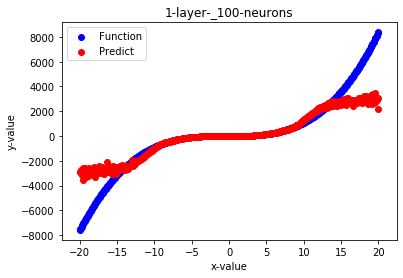

In [5]:
first_layer_num = 100 #1層, 100個neuro
epochs = 100

x_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))
y_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))

first_layer = tf.layers.dense(inputs = x_holder, units = first_layer_num, activation =  tf.nn.relu)
y_pred = tf.layers.dense(inputs = first_layer, units = data_num)

loss = tf.losses.mean_squared_error(y_pred, y_holder)
optimizer = tf.train.AdamOptimizer()
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: x_train, y_holder: y_train }
    for epochs in range(epochs):
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    
    ud , loss_val, yp = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    case3_record = loss_val
    print("--------------------------------------------")
    print("之前的紀錄: ")
    print(case1_str, ": loss_val:",case1_record)
    print(case2_str, ": loss_val:",case2_record)
    print("--------------------------------------------")
    print(case3_str, ": loss_val:",case3_record)
    print("--------------------------------------------")
    
    plt.xlabel('x-value')
    plt.ylabel('y-value')
    plt.title(case3_str)
    plt.scatter( list(x for x in x_test), list(y for y in y_test) ,color = 'blue',label='Function')
    plt.scatter( list(x for x in x_test), list(x for x in pred_val) ,color = 'red', label='Predict')
    plt.legend()
    plt.show()

##### 從上圖可以看到
##### 改成100顆 即使只有一層 有準很多
##### 不過靠近邊緣的值 預測就比較不準
---

#### 測試 case 4:
##### 只用一層、1000 顆 neuro
###### activation function 使用 relu
###### optimizer function 使用 AdamOptimizer
###### epochs 設 100 次

--------------------------------------------
之前的紀錄: 
1-layer-___5-neurons : loss_val: 8849060.0
1-layer-__20-neurons : loss_val: 6919628.5
1-layer-_100-neurons : loss_val: 2146835.5
--------------------------------------------
1-layer-1000-neurons : loss_val: 2641.937
--------------------------------------------


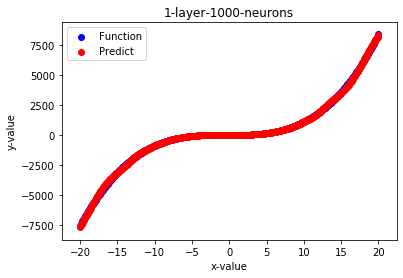

In [6]:
first_layer_num = 1000 #1層, 1000個neuro
epochs = 100

x_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))
y_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))

first_layer = tf.layers.dense(inputs = x_holder, units = first_layer_num, activation =  tf.nn.relu)
y_pred = tf.layers.dense(inputs = first_layer, units = data_num)

loss = tf.losses.mean_squared_error(y_pred, y_holder)
optimizer = tf.train.AdamOptimizer()
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: x_train, y_holder: y_train }
    for epochs in range(epochs):
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    
    ud , loss_val, yp = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    case4_record = loss_val
    print("--------------------------------------------")
    print("之前的紀錄: ")
    print(case1_str, ": loss_val:",case1_record)
    print(case2_str, ": loss_val:",case2_record)
    print(case3_str, ": loss_val:",case3_record)
    print("--------------------------------------------")
    print(case4_str, ": loss_val:",case4_record)
    print("--------------------------------------------")
    
    plt.xlabel('x-value')
    plt.ylabel('y-value')
    plt.title(case4_str)
    plt.scatter( list(x for x in x_test), list(y for y in y_test) ,color = 'blue',label='Function')
    plt.scatter( list(x for x in x_test), list(x for x in pred_val) ,color = 'red', label='Predict')
    plt.legend()
    plt.show()

##### 從上圖可以看到
##### 改成1000顆 即使只有一層 有準非常多
##### 接下來我們測試不同層數的影響
---

#### 測試 case 5:
##### 改回 20 顆 neuro
##### 這次用2層 (2層都20顆)
###### activation function 使用 relu
###### optimizer function 使用 AdamOptimizer
###### epochs 設 100 次

--------------------------------------------
之前的紀錄: 
1-layer-___5-neurons : loss_val: 8849060.0
1-layer-__20-neurons : loss_val: 6919628.5
1-layer-_100-neurons : loss_val: 2146835.5
1-layer-1000-neurons : loss_val: 2641.937
--------------------------------------------
2-layer-__20-neurons : loss_val: 3263957.5
--------------------------------------------


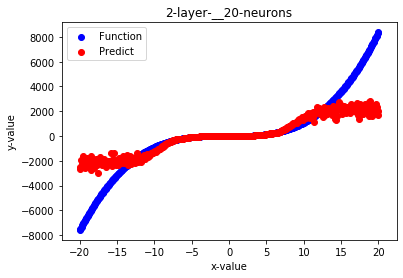

In [7]:
first_layer_num  = 20 #第1層, 20個neuro
second_layer_num = 20 #第2層, 20個neuro
epochs = 100

x_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))
y_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))

first_layer =  tf.layers.dense(inputs = x_holder, units = first_layer_num, activation =  tf.nn.relu)
second_layer = tf.layers.dense(inputs = first_layer, units = second_layer_num, activation =  tf.nn.relu)
y_pred = tf.layers.dense(inputs = second_layer, units = data_num)

loss = tf.losses.mean_squared_error(y_pred, y_holder)
optimizer = tf.train.AdamOptimizer()
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: x_train, y_holder: y_train }
    for _ in range(epochs):
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    
    ud , loss_val, yp = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    case5_record = loss_val
    print("--------------------------------------------")
    print("之前的紀錄: ")
    print(case1_str, ": loss_val:",case1_record)
    print(case2_str, ": loss_val:",case2_record)
    print(case3_str, ": loss_val:",case3_record)
    print(case4_str, ": loss_val:",case4_record)
    print("--------------------------------------------")
    print(case5_str, ": loss_val:",case5_record)
    print("--------------------------------------------")
    
    plt.xlabel('x-value')
    plt.ylabel('y-value')
    plt.title(case5_str)
    plt.scatter( list(x for x in x_test), list(y for y in y_test) ,color = 'blue',label='Function')
    plt.scatter( list(x for x in x_test), list(x for x in pred_val) ,color = 'red', label='Predict')
    plt.legend()
    plt.show()

##### 從上圖可以看到
##### 僅有20顆 改成二層 
##### 在邊緣的部份，有比單層20顆好一點，但沒有單層100顆那麼強
##### 我們再試試多幾層 
---

#### 測試 case 6:
##### 一樣 20 顆 neuro
##### 這次用5層 (5層都20顆)
###### activation function 使用 relu
###### optimizer function 使用 AdamOptimizer
###### epochs 設 100 次

--------------------------------------------
之前的紀錄: 
1-layer-___5-neurons : loss_val: 8849060.0
1-layer-__20-neurons : loss_val: 6919628.5
1-layer-_100-neurons : loss_val: 2146835.5
1-layer-1000-neurons : loss_val: 2641.937
2-layer-__20-neurons : loss_val: 3263957.5
--------------------------------------------
5-layer-__20-neurons : loss_val: 948247.4
--------------------------------------------


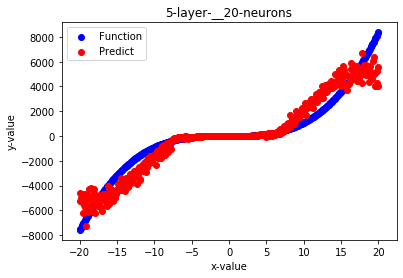

In [8]:
first_layer_num  = 20 #第1層, 20個neuro
second_layer_num = 20 #第2層, 20個neuro
third_layer_num = 20 #第3層, 20個neuro
fourth_layer_num = 20 #第4層, 20個neuro
fifth_layer_num = 20 #第5層, 20個neuro
epochs = 100

x_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))
y_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))

first_layer =  tf.layers.dense(inputs = x_holder, units = first_layer_num, activation =  tf.nn.relu)
second_layer = tf.layers.dense(inputs = first_layer, units = second_layer_num, activation =  tf.nn.relu)
third_layer =  tf.layers.dense(inputs = second_layer, units = third_layer_num, activation =  tf.nn.relu)
fourth_layer = tf.layers.dense(inputs = third_layer, units = fourth_layer_num, activation =  tf.nn.relu)
fifth_layer =  tf.layers.dense(inputs = fourth_layer, units = fifth_layer_num, activation =  tf.nn.relu) 
y_pred = tf.layers.dense(inputs = fifth_layer, units = data_num)

loss = tf.losses.mean_squared_error(y_pred, y_holder)
optimizer = tf.train.AdamOptimizer()
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: x_train, y_holder: y_train }
    for _ in range(epochs):
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    
    ud , loss_val, yp = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    case6_record = loss_val
    print("--------------------------------------------")
    print("之前的紀錄: ")
    print(case1_str, ": loss_val:",case1_record)
    print(case2_str, ": loss_val:",case2_record)
    print(case3_str, ": loss_val:",case3_record)
    print(case4_str, ": loss_val:",case4_record)
    print(case5_str, ": loss_val:",case5_record)
    print("--------------------------------------------")
    print(case6_str, ": loss_val:",case6_record)
    print("--------------------------------------------")
    
    plt.xlabel('x-value')
    plt.ylabel('y-value')
    plt.title(case6_str)
    plt.scatter( list(x for x in x_test), list(y for y in y_test) ,color = 'blue',label='Function')
    plt.scatter( list(x for x in x_test), list(x for x in pred_val) ,color = 'red', label='Predict')
    plt.legend()
    plt.show()

##### 從上圖可以看到 每層20顆
##### 二層改成五層 在邊緣提昇準度蠻多的，
##### 整體而言 5層20顆 比1層100顆好
##### 我們接著把每一層 都提升到 40顆 (5層 各40顆)
---

#### 測試 case 7:
##### 改成 40 顆 neuro
##### 一樣用5層 (5層都40顆)
###### activation function 使用 relu
###### optimizer function 使用 AdamOptimizer
###### epochs 設 100 次

--------------------------------------------
含這次的總紀錄: 
1-layer-___5-neurons : loss_val: 8849060.0
1-layer-__20-neurons : loss_val: 6919628.5
1-layer-_100-neurons : loss_val: 2146835.5
1-layer-1000-neurons : loss_val: 2641.937
2-layer-__20-neurons : loss_val: 3263957.5
5-layer-__20-neurons : loss_val: 948247.4
5-layer-__40-neurons : loss_val: 26970.973
--------------------------------------------


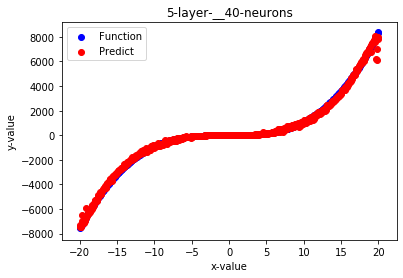

In [9]:
first_layer_num  = 40 #第1層, 40個neuro
second_layer_num = 40 #第2層, 40個neuro
third_layer_num = 40 #第3層, 40個neuro
fourth_layer_num = 40 #第4層, 40個neuro
fifth_layer_num = 40 #第5層, 40個neuro
epochs = 100

x_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))
y_holder = tf.placeholder(tf.float32, shape = (data_dimen,data_num))

first_layer  = tf.layers.dense(inputs = x_holder, units = first_layer_num, activation =  tf.nn.relu)
second_layer = tf.layers.dense(inputs = first_layer, units = second_layer_num, activation =  tf.nn.relu)
third_layer  = tf.layers.dense(inputs = second_layer, units = third_layer_num, activation =  tf.nn.relu)
fourth_layer = tf.layers.dense(inputs = third_layer, units = fourth_layer_num, activation =  tf.nn.relu)
fifth_layer  = tf.layers.dense(inputs = fourth_layer, units = fifth_layer_num, activation =  tf.nn.relu)
y_pred = tf.layers.dense(inputs = fifth_layer, units = data_num)

loss = tf.losses.mean_squared_error(y_pred, y_holder)
optimizer = tf.train.AdamOptimizer()  #GradientDescentOptimizer
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: x_train, y_holder: y_train }
    for _ in range(epochs):
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    
    ud , loss_val, yp = sess.run([updates, loss, y_pred], feed_dict = { x_holder: x_test, y_holder: y_test })
    case7_record = loss_val
    print("--------------------------------------------")
    print("含這次的總紀錄: ")
    print(case1_str, ": loss_val:",case1_record)
    print(case2_str, ": loss_val:",case2_record)
    print(case3_str, ": loss_val:",case3_record)
    print(case4_str, ": loss_val:",case4_record)
    print(case5_str, ": loss_val:",case5_record)
    print(case6_str, ": loss_val:",case6_record)
    print(case7_str, ": loss_val:",case7_record)
    print("--------------------------------------------")
    
    plt.xlabel('x-value')
    plt.ylabel('y-value')
    plt.title(case7_str)
    plt.scatter( list(x for x in x_test), list(y for y in y_test) ,color = 'blue',label='Function')
    plt.scatter( list(x for x in x_test), list(x for x in pred_val) ,color = 'red', label='Predict')
    plt.legend()
    plt.show()

##### 從上圖可以看到
##### 五層 每層各40顆 在 -20 ~ +20 的範圍
##### 預測結果已經很接近 單層1000顆了
---

---
####  HW PART 2:
##### 利用 tensorflow 撰寫一個神經網路針對產生的資料集做分類。
##### 將此一神經網路所判斷不同類別的區域分別塗上不同顏色。
##### 並且將資料集的資料也標示於圖上。
---

##### 先根據作業要求給出的程式碼，產生二元資料集
##### 然後使用 np_utils.to_categorical 將資料的label 
##### 以one-hot方式變成二列，以利之後計算 cross entropy

In [10]:
from sklearn import datasets
from keras.utils import np_utils
data_num = 50
circles_data, circles_data_labels = datasets.make_circles(n_samples = 50, factor = 0.1, noise = 0.1)
data_labels_onehot = np_utils.to_categorical(circles_data_labels)

Using TensorFlow backend.


---
##### 下面定義用來畫點的function

In [11]:
def plot_dataset(X, y, axes):
    plt.plot(X[y==0][:,0], X[y==0][:,1], 'bs')
    plt.plot(X[y==1][:,0], X[y==1][:,1], 'r^')
    plt.grid()
    plt.axis(axes)

---
##### 依據老師要求，使用 tensor flow 架出結構。
##### 先定義這次的神經網路架構:
##### 我們內部使用兩層，各50顆，activation-function 使用 relu
##### 最後面再接一層，只有2顆，activation-function 使用 sigmoid
##### loss function 使用 softmax_cross_entropy_with_logits
##### optimizer 使用 AdamOptimizer

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



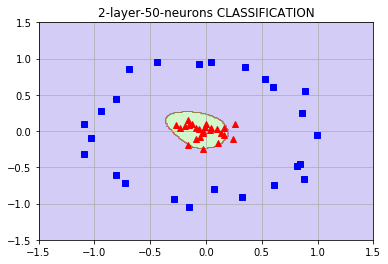

In [12]:
data_dimen = 2 #資料維度是2, 就是1組 (x,y)
data_num = 50  #一次丟50組 (x,y)

fst_layer_num = 50 #第1層, 50個neuro
sec_layer_num = 50 #第2層, 50個neuro
epochs = 50
case1_record = 0; 
case1_str = "2-layer-50-neurons CLASSIFICATION"

x_holder = tf.placeholder(tf.float32, shape = (None,data_dimen))
y_holder = tf.placeholder(tf.float32, shape = (None,data_dimen))

fst_layer = tf.layers.dense(inputs = x_holder,  units = fst_layer_num, activation =  tf.nn.relu)
sec_layer = tf.layers.dense(inputs = fst_layer, units = sec_layer_num, activation =  tf.nn.relu)
y_pred = tf.layers.dense(inputs = sec_layer, units = data_dimen, activation =  tf.nn.sigmoid)

loss = tf.nn.softmax_cross_entropy_with_logits(labels = y_holder, logits = y_pred)
optimizer = tf.train.AdamOptimizer()
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: circles_data, y_holder: data_labels_onehot }
    #train model
    for _ in range(epochs): 
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = value_dict)

    #準備用等高線的方式畫面積，先產生夠多的平均分佈點
    x0s = np.linspace(-1.5, 1.5 , 200)
    x1s = np.linspace(-1.5, 1.5, 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    #丟進去model預測
    y_pred = sess.run([y_pred], feed_dict = { x_holder: X})
    #轉成只有0,1的結果
    one_zero_pred = []
    for i in range(len(y_pred)):
        for j in range(len(y_pred[i])):
            one_zero_pred.append (0. if y_pred[i][j][0]>y_pred[i][j][1] else 1.)
    #轉成可以畫圖的形狀
    one_zero_pred = np.array(one_zero_pred)
    one_zero_pred = one_zero_pred.reshape(x0.shape)
    #畫圖
    plt.title(case1_str)
    plt.contourf(x0, x1, one_zero_pred, cmap=plt.cm.brg, alpha=0.2)
    plot_dataset(circles_data, circles_data_labels, [-1.5, 1.5, -1.5, 1.5])

##### 顏色分佈是預測的結果
##### 藍紅點則是原本的正確答案
##### 從最後的圖可以看到，
##### 以目前的神經網路架構與訓練方式
##### 可以描繪出大致的分界範圍
##### 但在邊緣處仍 沒有 非常準確
##### 有些藍色區域仍有紅色的點
---

##### 我們試試把神經元數目提高
##### 改成內部兩層都100顆

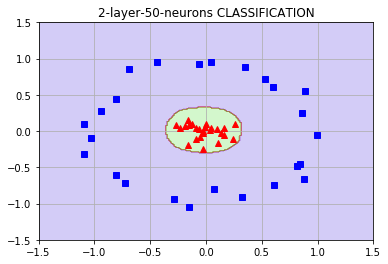

In [13]:
data_dimen = 2 #資料維度是2, 就是1組 (x,y)
data_num = 50  #一次丟50組 (x,y)

fst_layer_num = 100 #第1層, 50個neuro
sec_layer_num = 100 #第2層, 50個neuro
epochs = 50
case1_record = 0; 
case1_str = "2-layer-50-neurons CLASSIFICATION"

x_holder = tf.placeholder(tf.float32, shape = (None,data_dimen))
y_holder = tf.placeholder(tf.float32, shape = (None,data_dimen))

fst_layer = tf.layers.dense(inputs = x_holder,  units = fst_layer_num, activation =  tf.nn.relu)
sec_layer = tf.layers.dense(inputs = fst_layer, units = sec_layer_num, activation =  tf.nn.relu)
y_pred = tf.layers.dense(inputs = sec_layer, units = data_dimen, activation =  tf.nn.sigmoid)

loss = tf.nn.softmax_cross_entropy_with_logits(labels = y_holder, logits = y_pred)
optimizer = tf.train.AdamOptimizer()
updates = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    value_dict = { x_holder: circles_data, y_holder: data_labels_onehot }
    #train model
    for _ in range(epochs): 
        ud , loss_val, pred_val = sess.run([updates, loss, y_pred], feed_dict = value_dict)

    #準備用等高線的方式畫面積，先產生夠多的平均分佈點
    x0s = np.linspace(-1.5, 1.5 , 200)
    x1s = np.linspace(-1.5, 1.5, 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    #丟進去model預測
    y_pred = sess.run([y_pred], feed_dict = { x_holder: X})
    #轉成只有0,1的結果
    one_zero_pred = []
    for i in range(len(y_pred)):
        for j in range(len(y_pred[i])):
            one_zero_pred.append (0. if y_pred[i][j][0]>y_pred[i][j][1] else 1.)
    #轉成可以畫圖的形狀
    one_zero_pred = np.array(one_zero_pred)
    one_zero_pred = one_zero_pred.reshape(x0.shape)
    #畫圖
    plt.title(case1_str)
    plt.contourf(x0, x1, one_zero_pred, cmap=plt.cm.brg, alpha=0.2)
    plot_dataset(circles_data, circles_data_labels, [-1.5, 1.5, -1.5, 1.5])

##### 可以看到神經元增加後
##### 預測的邊界範圍有變準
---